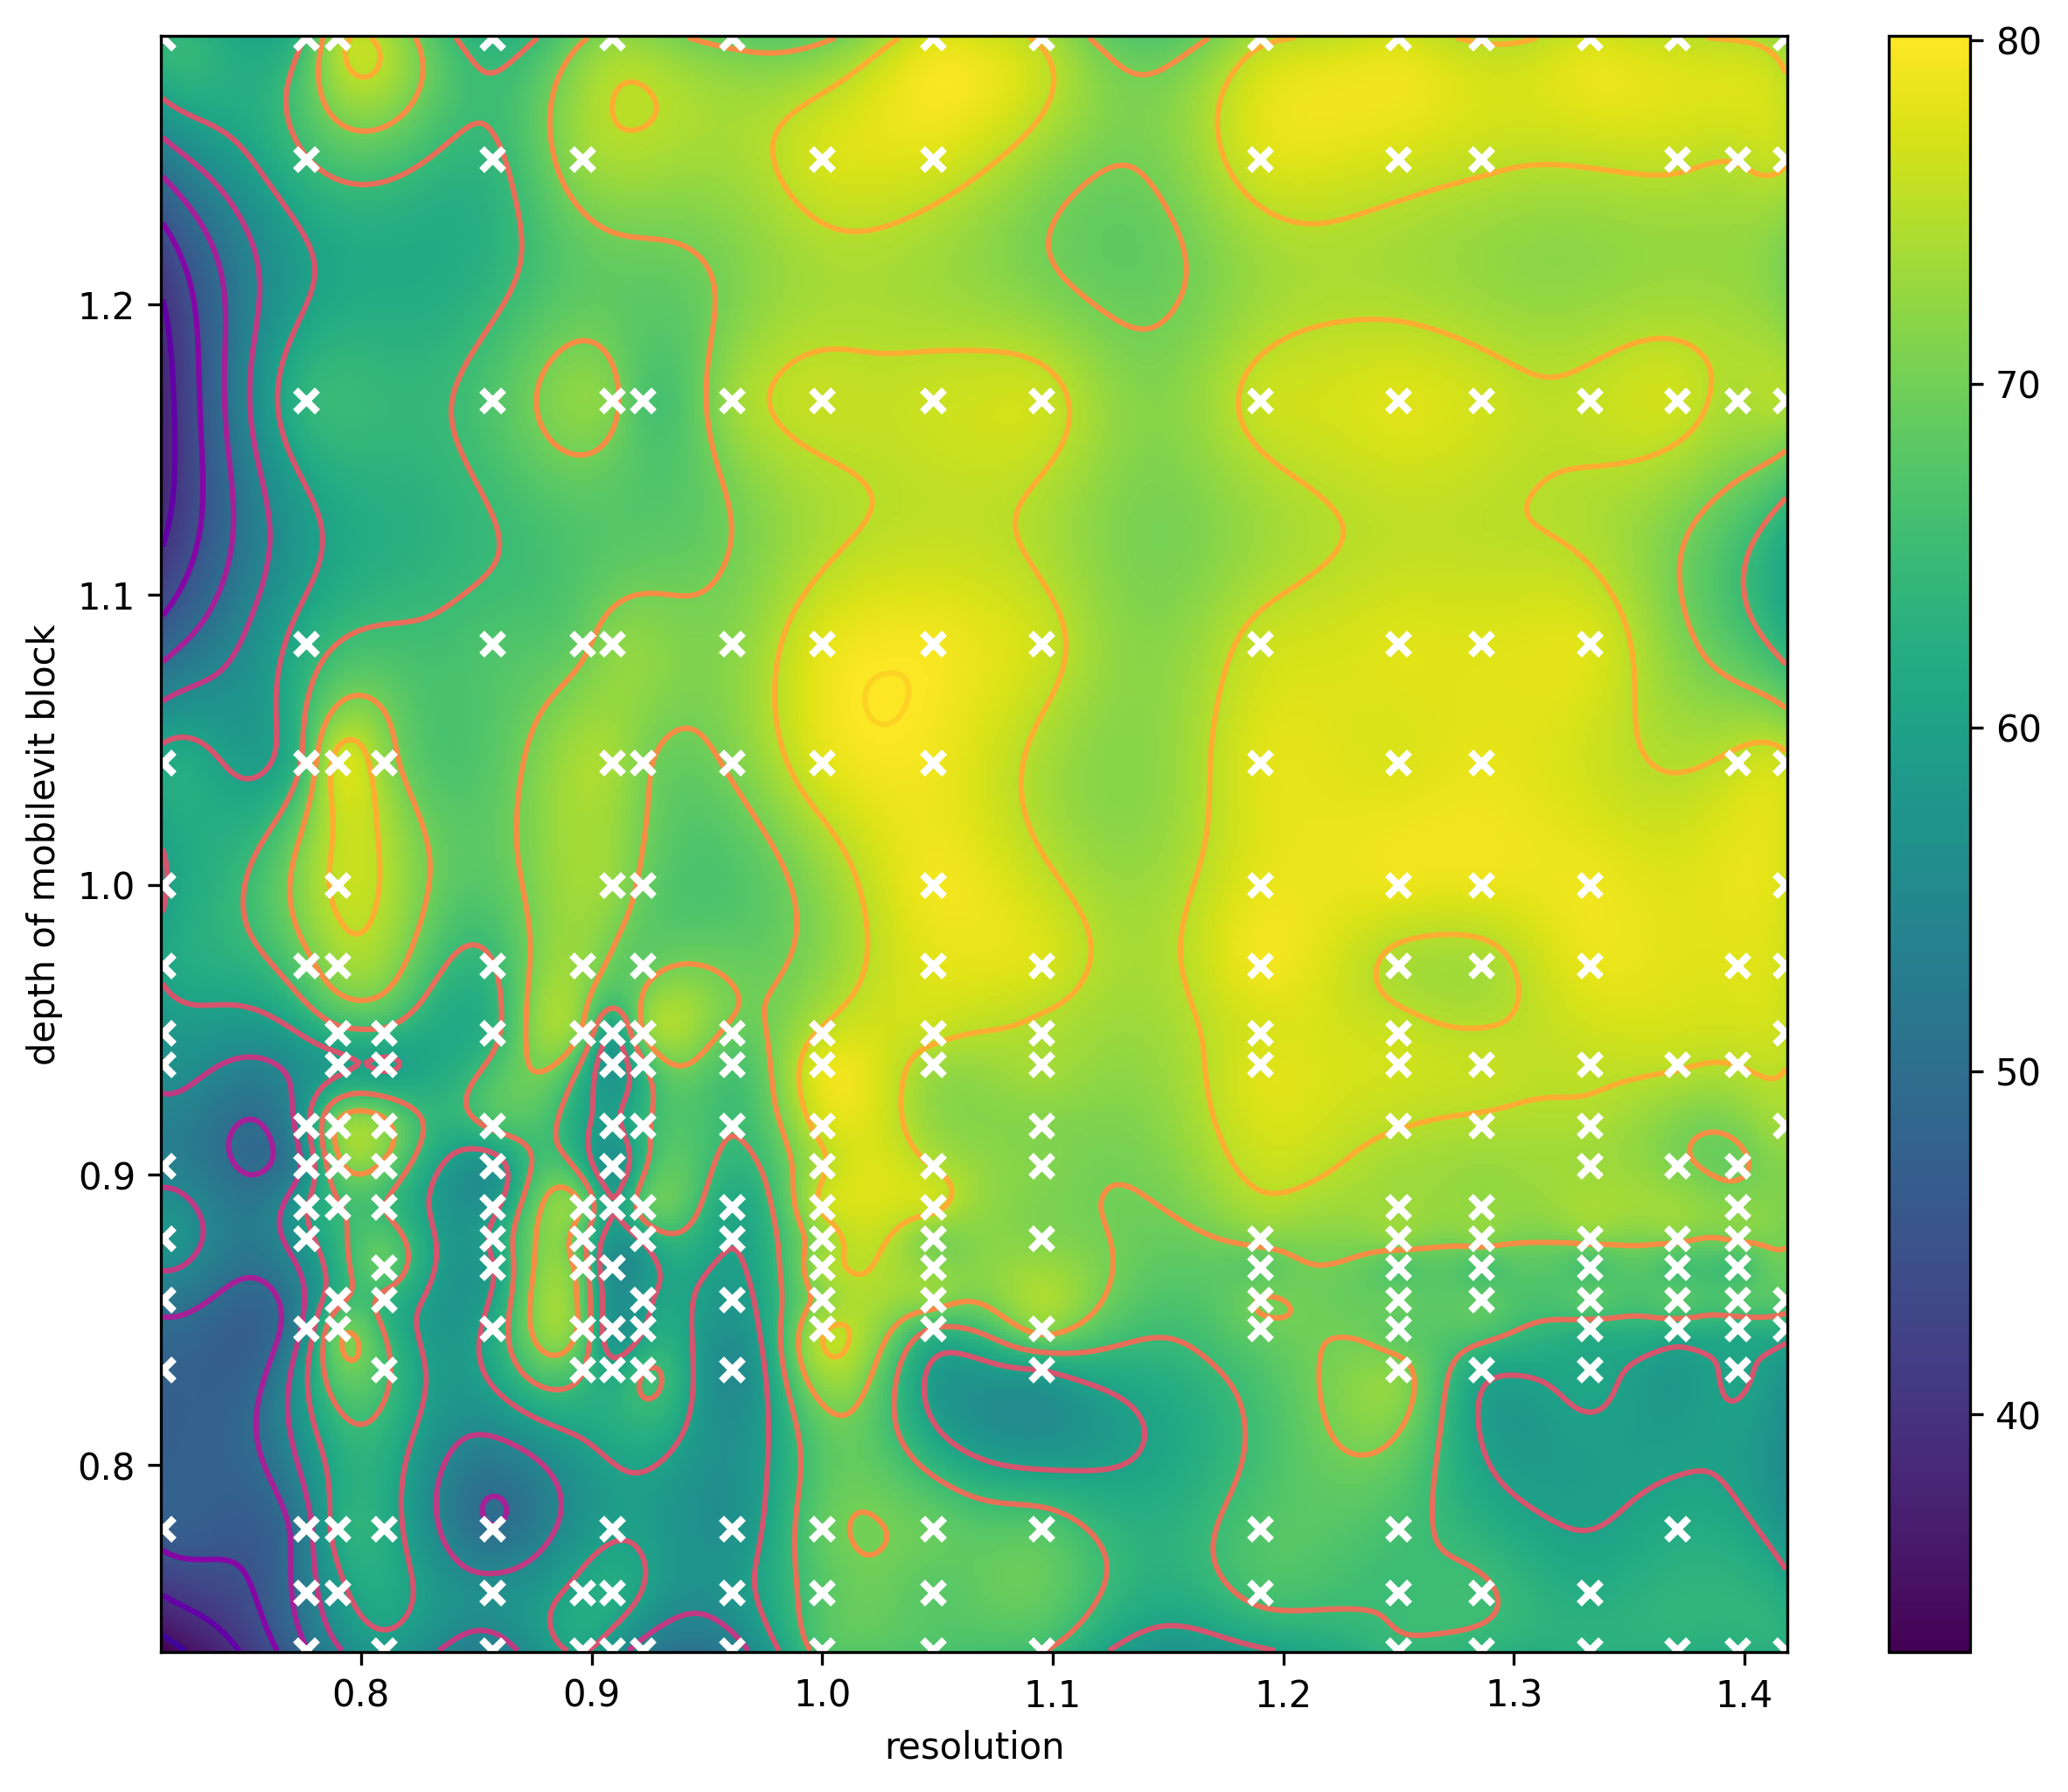

In [1]:
from itertools import product
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from sklearn.model_selection import train_test_split


data=pd.read_excel('w.xlsx',sheet_name='rdm-gp')

df=data
train_x=df.iloc[1:,0:2]
train_y=df.iloc[1:,2]
train_x=np.array(train_x)
train_y=np.array(train_y)

X, test_x, y, test_y = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
n=500

#x referx to resolution and depth of mobilevit block, y refers to performances
x1 = np.linspace(X[:,0].min(), X[:,0].max(),n) 
x2 = np.linspace(X[:,1].min(), X[:,1].max(),n) 
x = (np.array([x1, x2])).T

kernel = Matern([5,5], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)
gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)
X0p, X1p = x1x2[:,0].reshape(n,n), x1x2[:,1].reshape(n,n)
Zp = np.reshape(y_pred,(n,n))


fig = plt.figure(figsize=(10, 8),dpi=300)
ax = fig.add_subplot(111)
pc = ax.pcolormesh(X0p, X1p, Zp)
cbar = fig.colorbar(pc)
plt.contour(X0p, X1p, Zp, levels=10, cmap='plasma')
plt.plot(X[:, 0], X[:, 1], 'wx', mew=2)
plt.xlabel('resolution')
plt.ylabel('depth of mobilevit block')
plt.show()

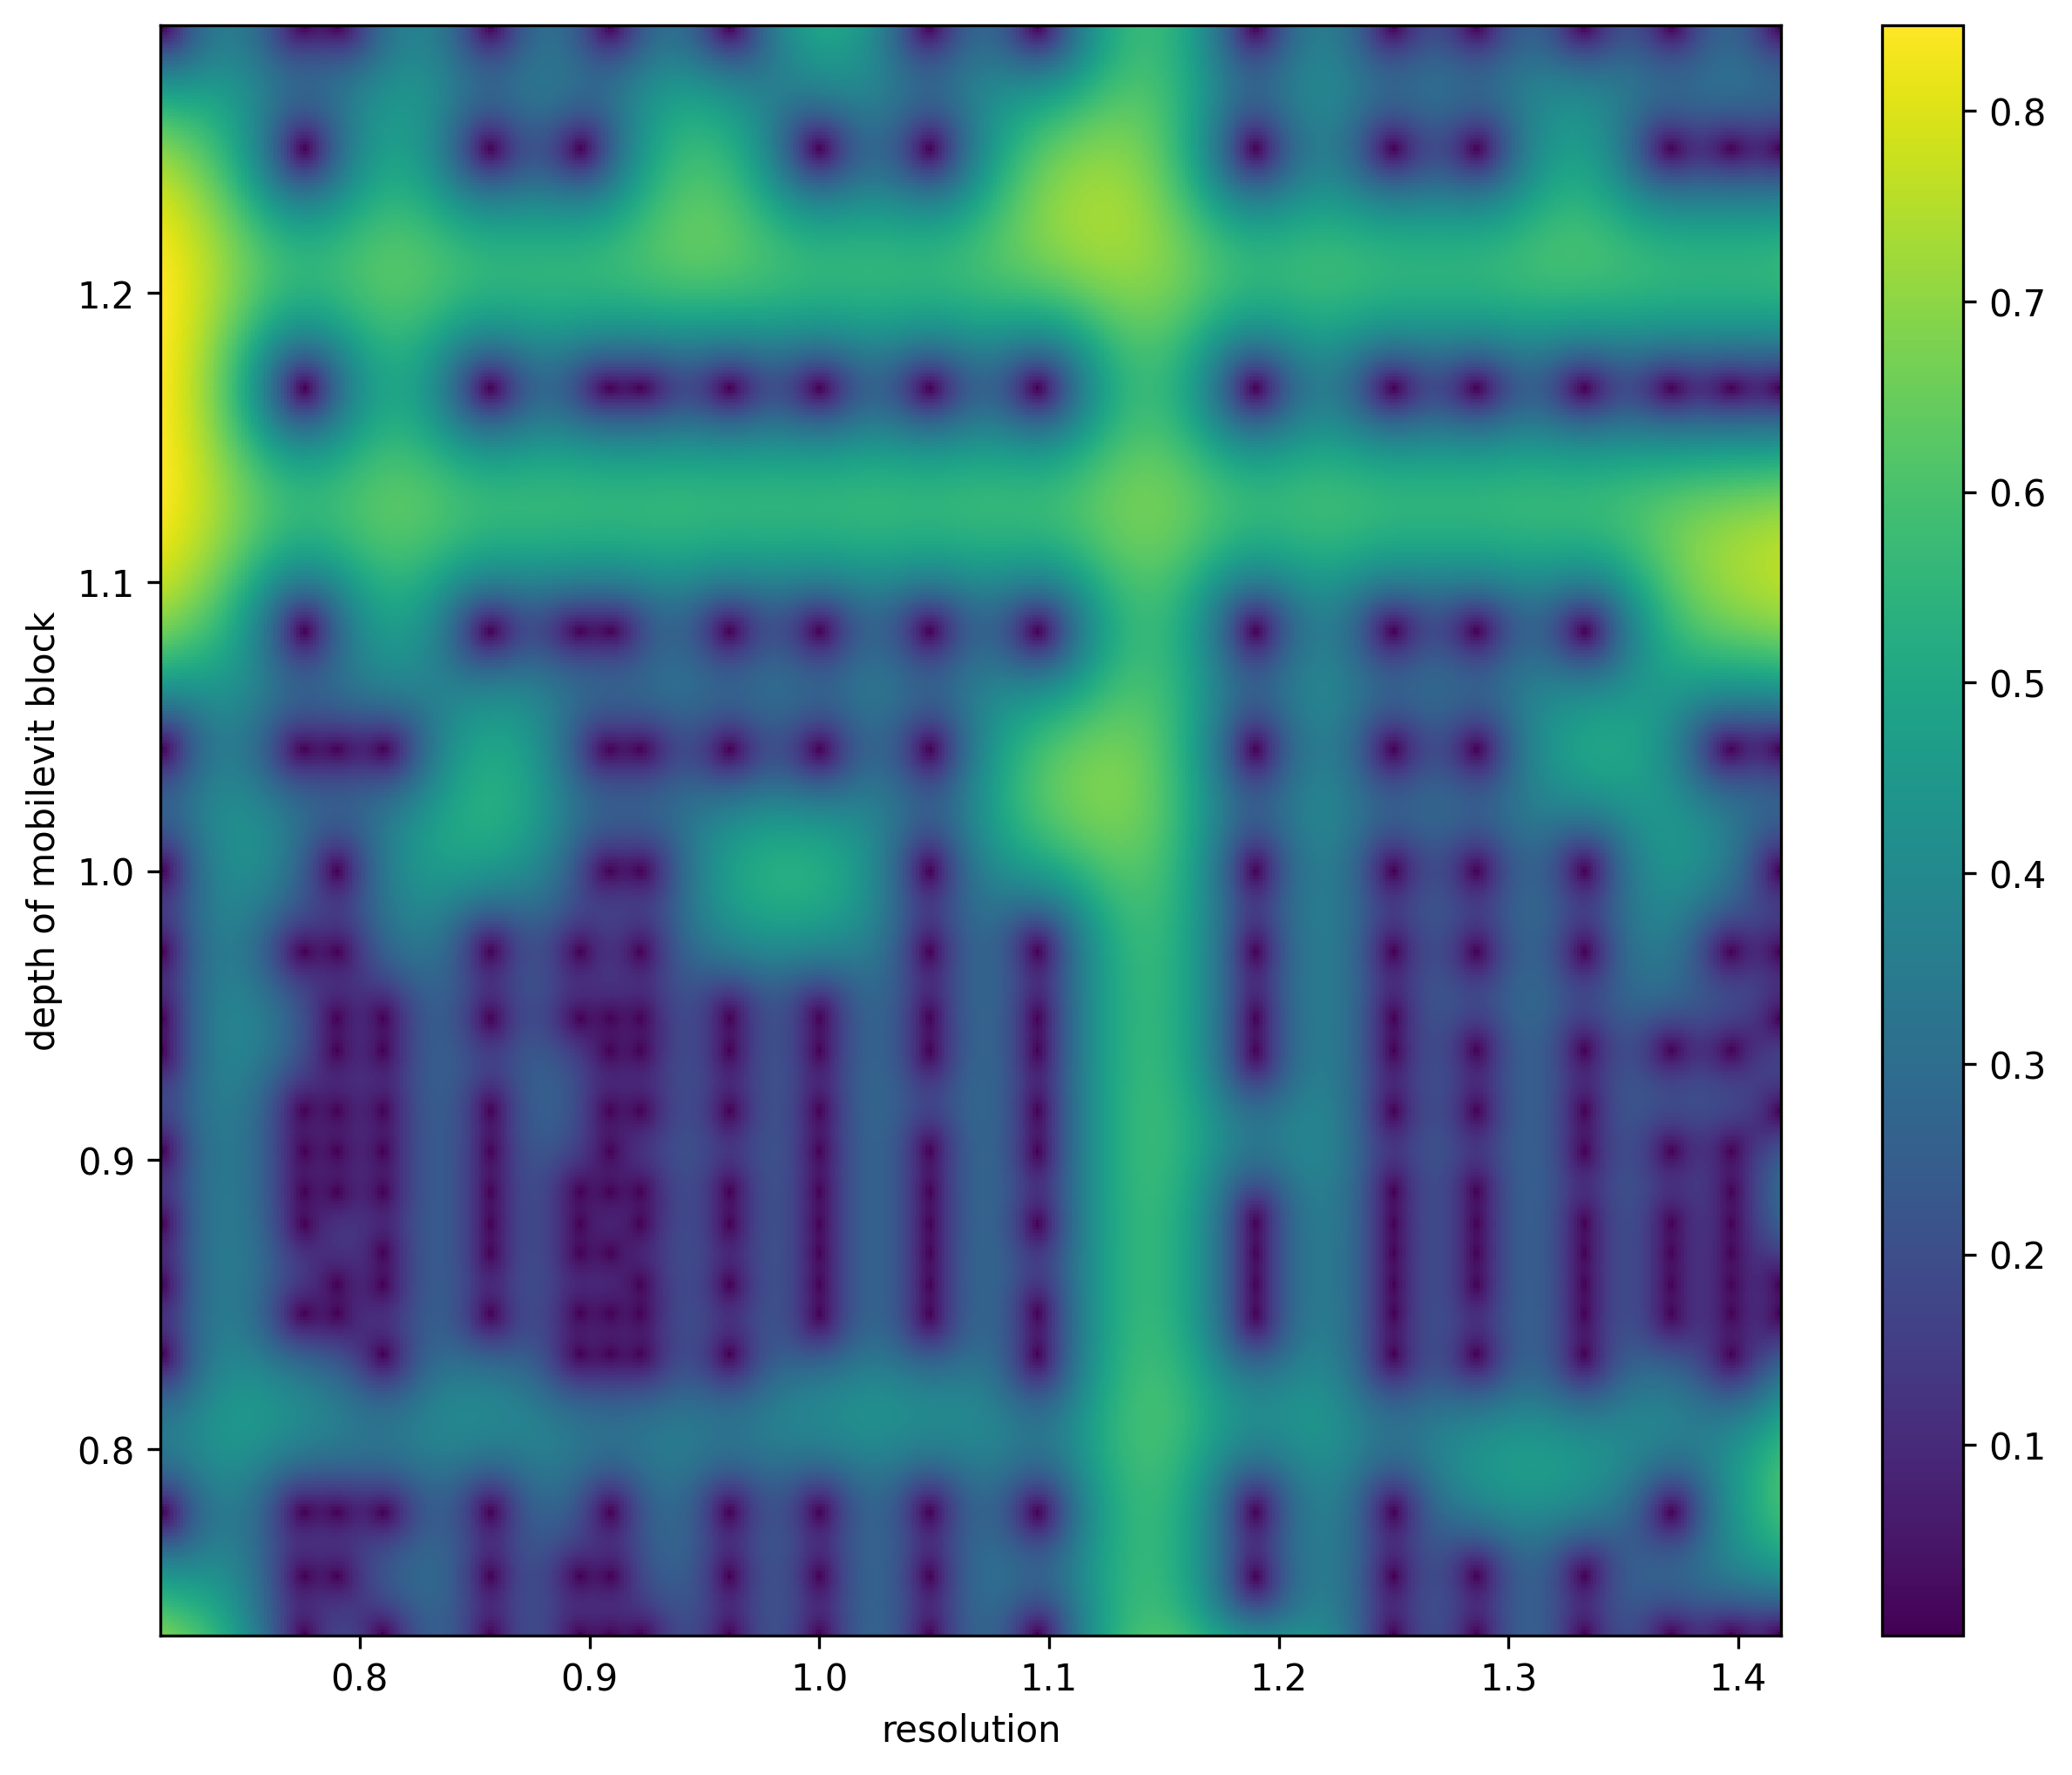

In [2]:
MSE = np.reshape(MSE,(n,n))
fig = plt.figure(figsize=(10,8),dpi=300)
ax = fig.add_subplot(111)
pc=ax.pcolormesh(X0p, X1p, MSE)
cbar = fig.colorbar(pc)
plt.xlabel('resolution')
plt.ylabel('depth of mobilevit block')
plt.show()